# Using Machine Learning Algorithms - Support Vector Machine (SVM) for Image Classification

## What is machine learning?

Machine learning is a of computer science that evolved from the study of pattern recognition and computational learning theory in artificial intelligence. Machine learning explores the study and construction of algorithms that can learn from and make predictions on data. Such algorithms operate by building a model from an example training set of input observations in order to make data-driven predictions or decisions expressed as outputs, rather than following strictly static program instructions.

Broadly, there are 3 types of Machine Learning Algorithms:
1. <b> Supervised Learning - </b> This algorithm consist of a target / outcome variable (or dependent variable) which is to be predicted from a given set of predictors (independent variables). Using these set of variables, we generate a function that map inputs to desired outputs. The training process continues until the model achieves a desired level of accuracy on the training data.

2. <b> Unsupervised Learning - </b> In this algorithm, we do not have any target or outcome variable to predict / estimate.  It is used for clustering population in different groups, which is widely used for segmenting customers in different groups for specific intervention.

3. <b> Reinforcement Learning: </b> Using this algorithm, the machine is trained to make specific decisions. It works this way: the machine is exposed to an environment where it trains itself continually using trial and error. This machine learns from past experience and tries to capture the best possible knowledge to make accurate business decisions.

Some of the commonly used machine learning algorithms are Linear Regression, Logistic Regression, Decision Tree, SVM, Naive Bayes, kNN, K-Means, Random Forest, etc.

### Basic Requirements to run this notebook
This Python notebook shows you how to use machine learning to build a classification model that maps images of single digit numbers to their corresponding numeric representations.

This notebook is adapted from various machine learning tutorials that describes the important machine learning concepts and includes code snippets here.

## What is SVM?

# Support Vector Machine

<b> Introduction to SVM </b>
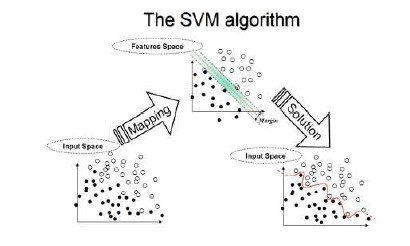

SVM is a supervised machine learning algorithm which when given a labelled training data outputs a hyperplane that can categorize new data.

### SVM Kernels
SVM consists of four differnet kernels. They are as follows: 
1. <b> Radial Basis Function Kernel </b> It is general-purpose kernel; used when there is no prior knowledge about the data. Equation is: 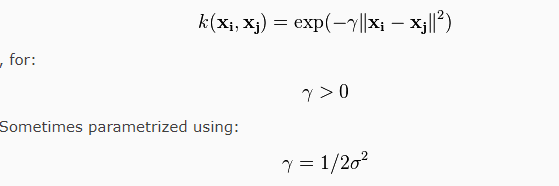
2. <b> Polynomial Kernel </b> It is popular in image processing. Equation is:
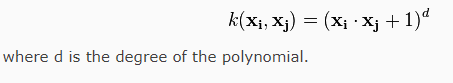
3. <b> Linear Kernel </b> It is useful when dealing with large sparse data vectors. It is often used in text categorization. This kernel also performs well in regression problems. Equation is: 
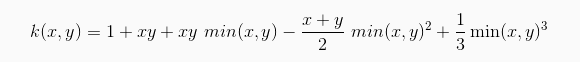
4. <b> Sigmoid Kernel </b> We can use it  as proxy for neural networks. Equation is
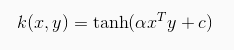

### Installing Python Libraries
Import libraries like sklearn and numpy that you will be using to run this notebook.

In [2]:
import numpy as np
from sklearn.decomposition import RandomizedPCA
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn import decomposition
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import time
import warnings; 
warnings.simplefilter('ignore')

## Loading MNIST data set of handwritten digits
MNIST is a database of handwritten numbers.You can also refer to the <a href="http://yann.lecun.com/exdb/mnist/">link</a> to view and read about MNIST datatset. Since MNIST uses real-world data, it is an ideal database for training neural networks and machine learning tools that use pattern recognition.
Run the following cell to get the MNIST data set of images of handwritten numbers:

In [3]:
# Fetching the dataset from 
# mldata.org/repository/data/viewslug/mnist-original through the sklearn helper
mnist = fetch_mldata("MNIST original")

In [4]:
print("Data shape (samples, dimensions)")
print(mnist.data.shape) #(70000, 784)

print("Number of classes")
print(np.unique(mnist.target)) #array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

Data shape (samples, dimensions)
(70000, 784)
Number of classes
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


## Split images into training and testing datasets

The first argument we specify is the data itself, which we normalize every pixel to be in range [0, 1.0].

In [5]:
# Keeping 60k out of 70k as train-set, as per the creators' instructions.
# Normalizing each pixel at [0,1].
X_train, y_train = np.float32(mnist.data[:60000])/ 255., np.float32(mnist.target[:60000])

### To reduce the dimensions, we fit the training data in Principal Component Analysis (PCA)

<b> Principal Component Analysis - </b> It is a dimension-reduction tool that can be used to reduce a large set of variables to a small set that still contains most of the information in the large set. It is generally performed on a square symmetric matrix. A correlation matrix is used if the variances of individual variates differ much, or if the units of measurement of the individual variates differ.

<b> Objectives </b>
1. PCA reduces attribute space from a larger number of variables to a smaller number of factors and as such is a "non-dependent" procedure.
2. PCA is a dimensionality reduction or data compression method. The goal is dimension reduction and there is no guarantee that the dimensions are interpretable.
3. To select a subset of variables from a larger set, based on which original variables have the highest correlations with the principal component.

In [6]:
# Fitting the train-set in PCA in order to reduce dimensions.
# N_components set after experimenting with variance, trying to keep 
# over 90% of the initial information.
pca = RandomizedPCA(n_components=90)
pca.fit(X_train)

RandomizedPCA(copy=True, iterated_power=2, n_components=90, random_state=None,
       whiten=False)

## Variance Ratio

<b> Variance ratio </b> is defined as the ratio of variance to mean. It is defined only for those models, where the mean is non zero. It is frequently used with exponential and Poisson distribution for count data etc.

In [7]:
# Plot explained variance ratio for the new dimensions.
print("Variance explained")
print(np.sum(pca.explained_variance_ratio_))


Variance explained
0.901877


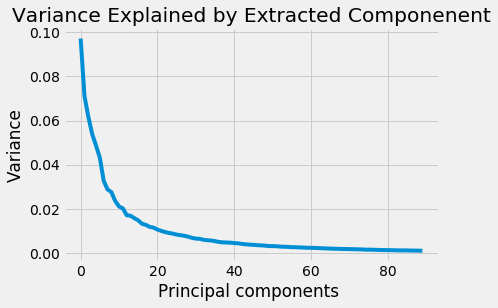

In [8]:
#Styling graph with thicker lines and flat colors
with plt.style.context('fivethirtyeight'):    
    plt.show()
    plt.xlabel("Principal components ")
    plt.ylabel("Variance")
    plt.plot(pca.explained_variance_ratio_)
    plt.title('Variance Explained by Extracted Componenent')

plt.show()

In [9]:
# Fitting the new dimensions to the train-set.
trainset = pca.fit_transform(X_train)

In [10]:
# New dimensions
print("Train-set dimensions after PCA")
print(trainset.shape)

Train-set dimensions after PCA
(60000, 90)


In [11]:
# Check how much time it takes to fit the SVM
start_time = int(round(time.time() * 1000))

### SVM Classifier

Here, the train data is fitted in the SVM classifier where the parameters are fine tuned. 

<b> Cross Validation </b> 
The k-fold cross-validation is commonly used to evaluate the effectiveness of SVMs with the selected hyper-parameters. It is known that the SVM k-fold cross-validation is expensive, since it requires training k SVMs.

In [12]:
# Fitting training data to SVM classifier.
# Fine-tuning parameters session included
# rbf, poly, linear and different values of gammma and C
classifier = svm.SVC(gamma=0.01, C=3, kernel='poly')
classifier.fit(trainset,y_train)

print("Cross validation accuracy")
print(cross_validation.cross_val_score(classifier, trainset, y_train, cv=5))

Cross validation accuracy
[ 0.97700958  0.97792035  0.97483333  0.97407685  0.97807603]


In [13]:
# End of time benchmark
end_time = int(round(time.time() * 1000))
print("SVM fitting finished in ", (end_time-start_time), "ms ")

SVM fitting finished in  610785 ms 


In [14]:
# Using the last 10k samples as test set against the already trained cross-validated train-set.
X_test, y_test = np.float32(mnist.data[60000:]) / 255., np.float32(mnist.target[60000:])

## Confusion Matrix

In [15]:
# Fitting the new dimensions.
testset = pca.transform(X_test)
print("Test-set dimensions after PCA")
print(testset.shape)
expected = y_test
predicted = classifier.predict(testset)

print("Results")
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
print('\n')
print("Accuracy Score")
accuracy_score(y_test, predicted, normalize = True)

Test-set dimensions after PCA
(10000, 90)
Results
Classification report for classifier SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99       980
        1.0       0.99      0.99      0.99      1135
        2.0       0.97      0.97      0.97      1032
        3.0       0.98      0.98      0.98      1010
        4.0       0.98      0.98      0.98       982
        5.0       0.98      0.98      0.98       892
        6.0       0.99      0.98      0.98       958
        7.0       0.98      0.97      0.97      1028
        8.0       0.96      0.98      0.97       974
        9.0       0.96      0.96      0.96      1009

avg / total       0.98      0.98      0.98     10000


Confusion matrix:
[[ 968    0    1    0    0    5 

0.97829999999999995

## The accuracy comes upto 97.83%

### Randomly selecting few test images and evaluating its predictions

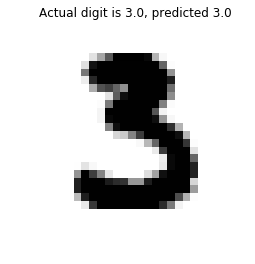

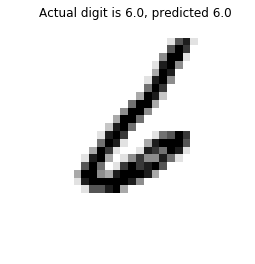

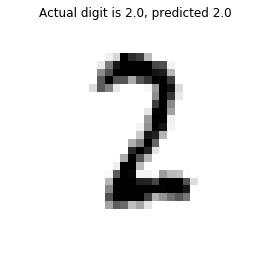

In [16]:
# Selecting randomly some testing samples
# Comparing expected label with predicted 
# Falsely classified images appeared after some experimentation with "size" and 
# by lowering the train-set size in order to decrease overall accuracy
for i in np.random.choice(np.arange(0, len(expected)), size = (3,)):
    pred = classifier.predict(np.atleast_2d(testset[i]))	
    image = (X_test[i] * 255).reshape((28, 28)).astype("uint8")	
    plt.figure()  
    plt.axis("off")
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Actual digit is {0}, predicted {1}".format(expected[i], pred[0]))

plt.show()

<a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/3.0/us/88x31.png" /></a><br>The text in the document by RADHIKA GATHIA and SHWETA TATIYA is licensed under <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/">Creative Commons Attribution 3.0 United States License</a>.<br><br>


The code in the document by RADHIKA GATHIA and SHWETA TATIYA is licensed under the MIT License https://opensource.org/licenses/MIT

## References

In [ ]:
# Dataset 
#http://yann.lecun.com/exdb/mnist/

# References

#https://arxiv.org/abs/1611.07659
#https://en.wikipedia.org/wiki/Support_vector_machine
#https://www.youtube.com/watch?v=aZsZrkIgan0
#https://www.youtube.com/watch?v=iQdWX1327XQ
#https://www.quora.com/What-are-kernels-in-machine-learning-and-SVM-and-why-do-we-need-them
#https://en.wikipedia.org/wiki/Kernel_method